In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('spam.csv', sep = ',', encoding= 'Latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.describe


<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [12]:
df['Unnamed: 2'].isnull().sum()

5522

In [14]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1,inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [18]:
len(df)

5572

In [20]:
df['v1'].value_counts()
# it is evident that this model is highly skewed and will be prone to overfitting
# which not fit for classificaation

ham     4825
spam     747
Name: v1, dtype: int64

# Balancing the data

In [22]:
ham = df[df['v1']=='ham']
ham.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [24]:
spam = df[df['v1']=='spam']
spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [31]:
ham.shape,spam.shape[0]

((4825, 2), 747)

In [33]:
# randomly sampling from ham 

ham = ham.sample(spam.shape[0])

In [35]:
ham.shape

(747, 2)

In [37]:
data = ham.append(spam, ignore_index = True)
data.tail()

,v1,v2
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1493,spam,This is the 2nd time we have tried 2 contact u...


### Exploratory data analysis

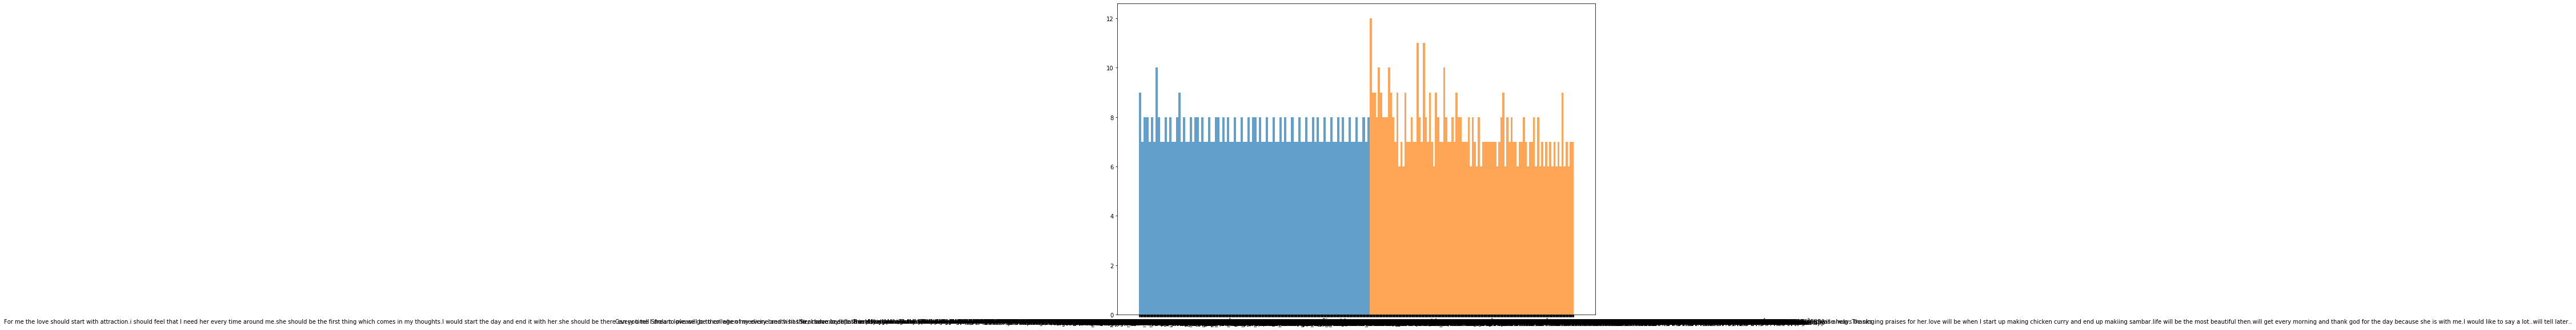

In [44]:
plt.figure(figsize = (15,10))
plt.hist(data[data['v1']=='ham']['v2'], bins = 100, alpha = 0.7)

plt.hist(data[data['v1']=='spam']['v2'], bins = 100, alpha = 0.7)
plt.show()

# Data prepration

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
X_train,X_test, y_train,y_test = train_test_split(data['v2'], data['v1'], test_size = 0.2, random_state = 0,shuffle = True, stratify = data['v1'])

In [57]:
y_train

124      ham
662      ham
1007    spam
1151    spam
1096    spam
        ... 
1321    spam
312      ham
268      ham
272      ham
934     spam
Name: v1, Length: 1195, dtype: object

### Bag of words creation

In [58]:
vectorizer = TfidfVectorizer()

In [59]:
X_train = vectorizer.fit_transform(X_train)

In [66]:
# rows = number of text colums = number of unique words
X_train.shape

(1195,)

###  Pipeline and Random Forest

In [65]:
# a pipeline is used to 
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators = 100,n_jobs = -1))])

In [68]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [69]:
y_pred = clf.predict(X_test)

In [71]:
confusion_matrix(y_test,y_pred)

array([[148,   2],
       [ 18, 131]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       150
        spam       0.98      0.88      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



In [76]:
accuracy_score(y_test,y_pred)

0.9331103678929766

In [78]:
clf.predict(['hello this is musingila'])

array(['ham'], dtype=object)

In [85]:
clf.predict(['This is your lucky day you have a free tickets to the usa'])

array(['ham'], dtype=object)

### SVM


In [106]:
# a pipeline is used to 
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf',SVC(C=300, gamma = 'auto') )])

In [107]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=300, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto

In [108]:
y_pred = clf.predict(X_test)

In [109]:
confusion_matrix(y_test, y_pred)

array([[144,   6],
       [ 14, 135]], dtype=int64)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.96      0.94       150
        spam       0.96      0.91      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

